# Introduction to data science: data

#### This is a very quick introduction. Time needed: about an hour.

We'll explore the Pandas package for simple data handling tasks using geoscience data examples, and we'll follow it up with a quick look at `scikit-learn` for fitting machine learning models and making predictions.

## Reading a CSV

Pandas reads files from disk in tabular form &mdash; [here is a list](https://pandas.pydata.org/docs/user_guide/io.html) of all the formats that it can read and write. A very common format is CSV, so let's load one!

Conveniently, you can give `pandas` the CSV in a URL or a file path:

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/scienxlab/datasets/main/rpc/3-lithologies.csv"
df = pd.read_csv(url)
df.head()

,RPC,Description,Lithology,Vp,Vs,Rho
0,101023,Gray Shale,shale,4953.66,2957.26,2.71
1,100978,Olentangy Shale,shale,3444.66,2318.00,2.68
2,100993,Brown Gas Shale,shale,3507.80,2218.53,2.56
3,101048,Shale 2 (Density is assumed constant),shale,2988.89,1633.33,2.60
4,100417,Tight gas shale,shale,3642.00,2221.00,2.46


In [2]:
df.dtypes

RPC              int64
Description     object
Lithology       object
Vp             float64
Vs             float64
Rho            float64
dtype: object

## Exploring your data

- [ ] Get a column, plot a column
- [ ] Do some maths
- [ ] Use `df.loc`
- [ ] Change the index with `df.set_index()`
- [ ] Use `df.describe()` with `include='all'`

In [3]:
df['Vp']

0      4953.66
1      3444.66
2      3507.80
3      2988.89
4      3642.00
        ...   
435    4625.98
436    5446.19
437    5446.19
438    5347.77
439    5347.77
Name: Vp, Length: 440, dtype: float64

In [4]:
df['Vp'] / 1000

0      4.95366
1      3.44466
2      3.50780
3      2.98889
4      3.64200
        ...   
435    4.62598
436    5.44619
437    5.44619
438    5.34777
439    5.34777
Name: Vp, Length: 440, dtype: float64

In [5]:
# Select one row based on default integer index.
df.loc[4]

RPC                     100417
Description    Tight gas shale
Lithology                shale
Vp                      3642.0
Vs                      2221.0
Rho                       2.46
Name: 4, dtype: object

In [6]:
# Change the row index.
# NB Can only run this once, becase RPC is removed from columns.
df = df.set_index('RPC')
df.head()

,Description,Lithology,Vp,Vs,Rho
RPC,,,,,
101023,Gray Shale,shale,4953.66,2957.26,2.71
100978,Olentangy Shale,shale,3444.66,2318.00,2.68
100993,Brown Gas Shale,shale,3507.80,2218.53,2.56
101048,Shale 2 (Density is assumed constant),shale,2988.89,1633.33,2.60
100417,Tight gas shale,shale,3642.00,2221.00,2.46


In [7]:
# Select some rows and 2 columns.
df.loc[df['Vp'] > 5800, ['Vp', 'Vs']]

,Vp,Vs
RPC,,
102855,5940.00,3140.00
101136,5895.34,3227.69
102278,5905.51,3313.65
102111,5807.09,2896.98
102124,5938.32,3218.50
102101,5938.32,2926.51
102277,5807.09,3280.84
102103,5938.32,3379.27
102102,5938.32,3346.46


In [ ]:
# Etc, etc.


### Exercise

- Have a quick look at [the Pandas documentation](https://pandas.pydata.org/docs/).
- How are the missing values distributed across the lithologies?
- Use your new library to compute the Gardner density estimate and put it in a new column called `Rho_Gardner`.
- Use `sns.kdeplot()` to compare the distribution of the new column to the actual `Rho` data. (You could also use `sns.histplot()` but it needs a bit of parameterization.)
- Fill the empty (NaN) values in density with your computed densities. <a title="Use `pd.Series.fillna()` on the 'Rho' column.">Hover for hint.</a>

## Solutions

In [3]:
df.groupby('Lithology').count()

,RPC,Description,Vp,Vs,Rho
Lithology,,,,,
dolomite,200,200,200,200,200
limestone,40,40,40,40,28
shale,200,200,200,200,200


In [4]:
# One way.
from geocalc import gardner

df['Rho_Gardner'] = gardner(df['Vp'])

In [5]:
# Functional.
df['Rho_Gardner'] = df['Vp'].map(gardner)

If we wanted to be more awesome, we could try fitting our own Gardner parameters to the data we have for this rock type.

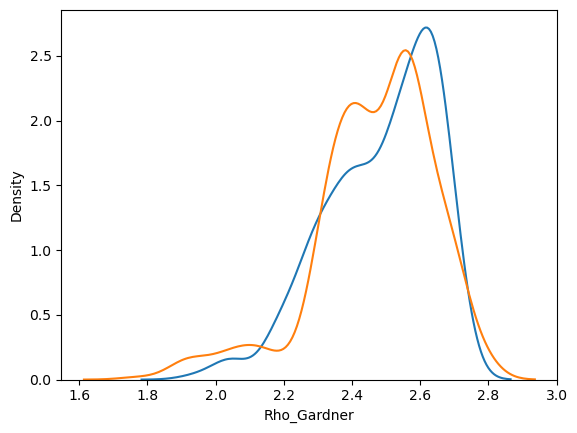

In [8]:
import seaborn as sns

ax = sns.kdeplot(df["Rho_Gardner"])
_ = sns.kdeplot(df['Rho'], ax=ax)

In [9]:
df['Rho'] = df['Rho'].fillna(df['Rho_Gardner'])

## Visual exploration of the data

We can easily visualize the properties of each facies and how they compare using a `PairPlot`. The library `seaborn` integrates with matplotlib to make these kind of plots easily.

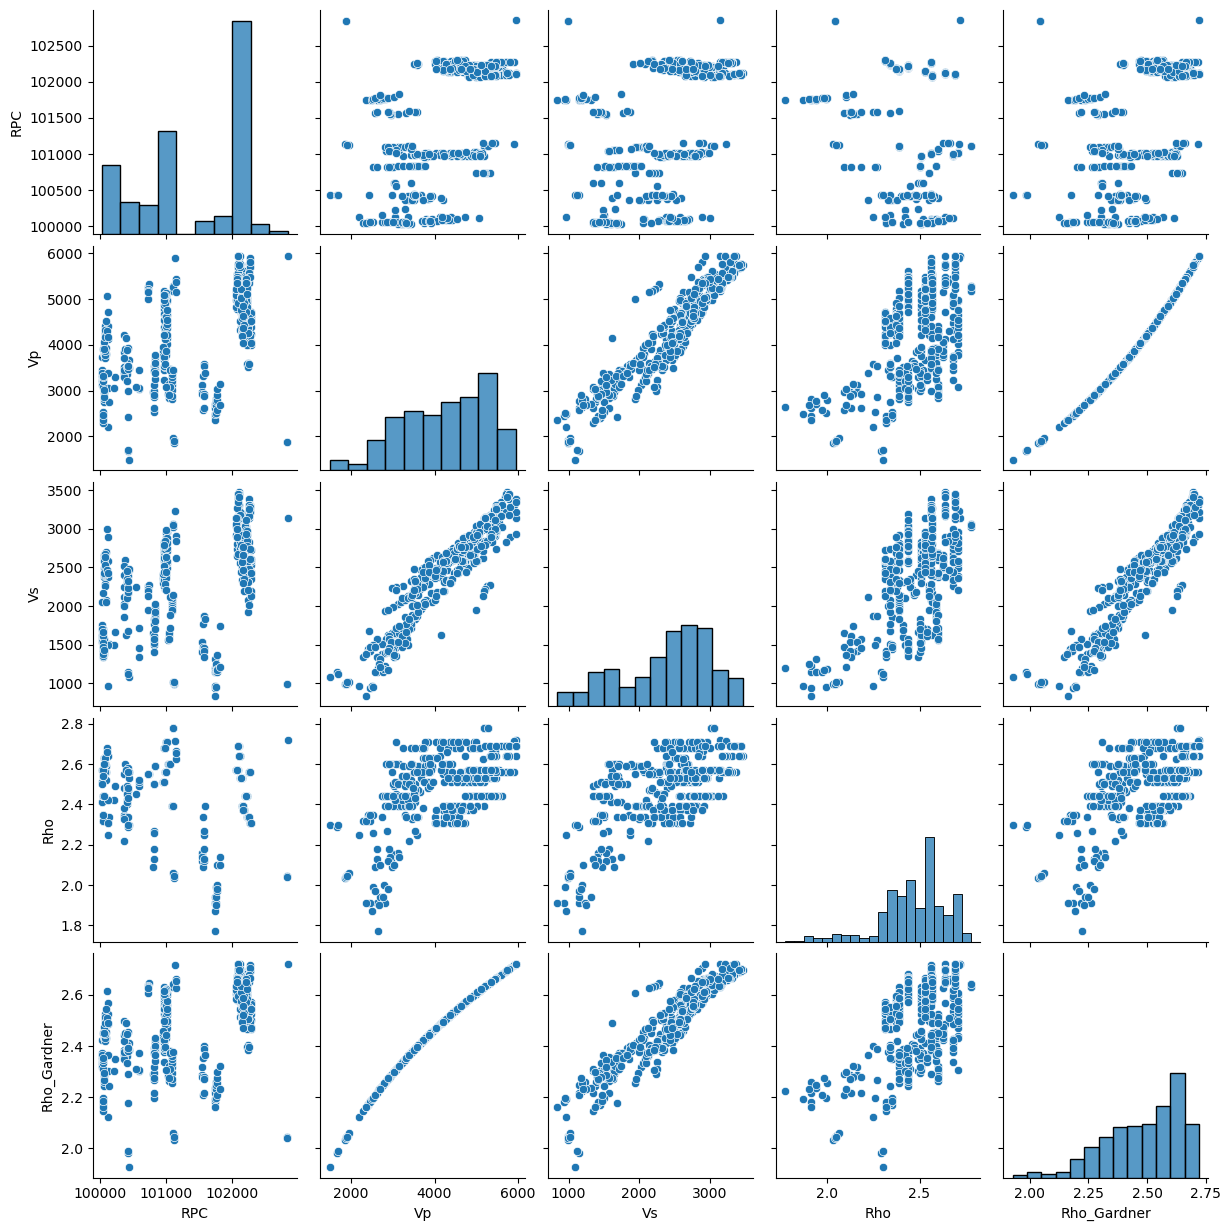

In [11]:
sns.pairplot(df)

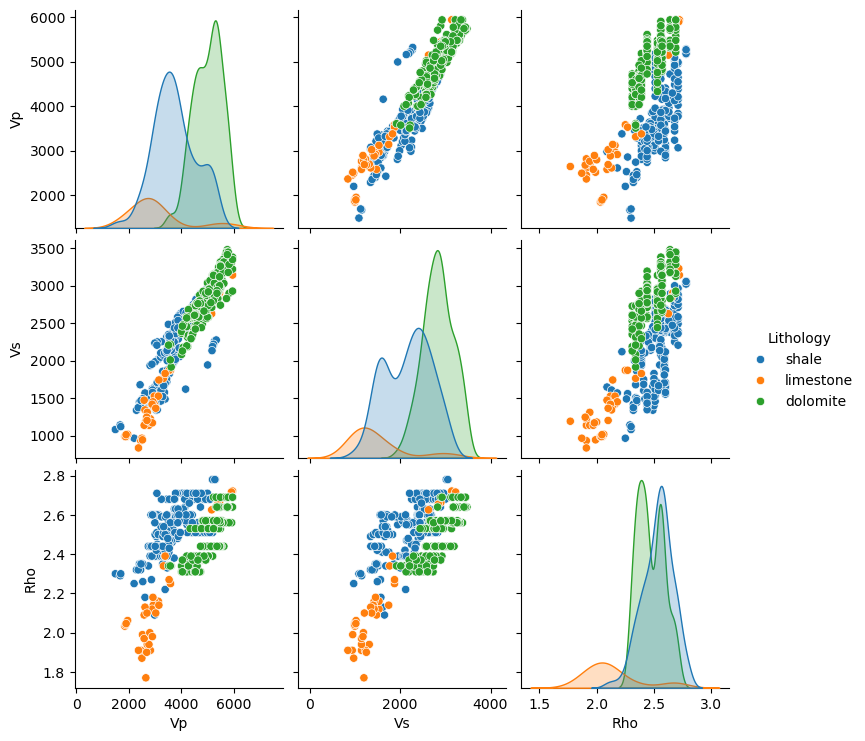

In [12]:
sns.pairplot(df,
             hue="Lithology",
             vars=['Vp','Vs','Rho'])

We can have a lot of control over all of the elements in the pair-plot by using the `PairGrid` object.

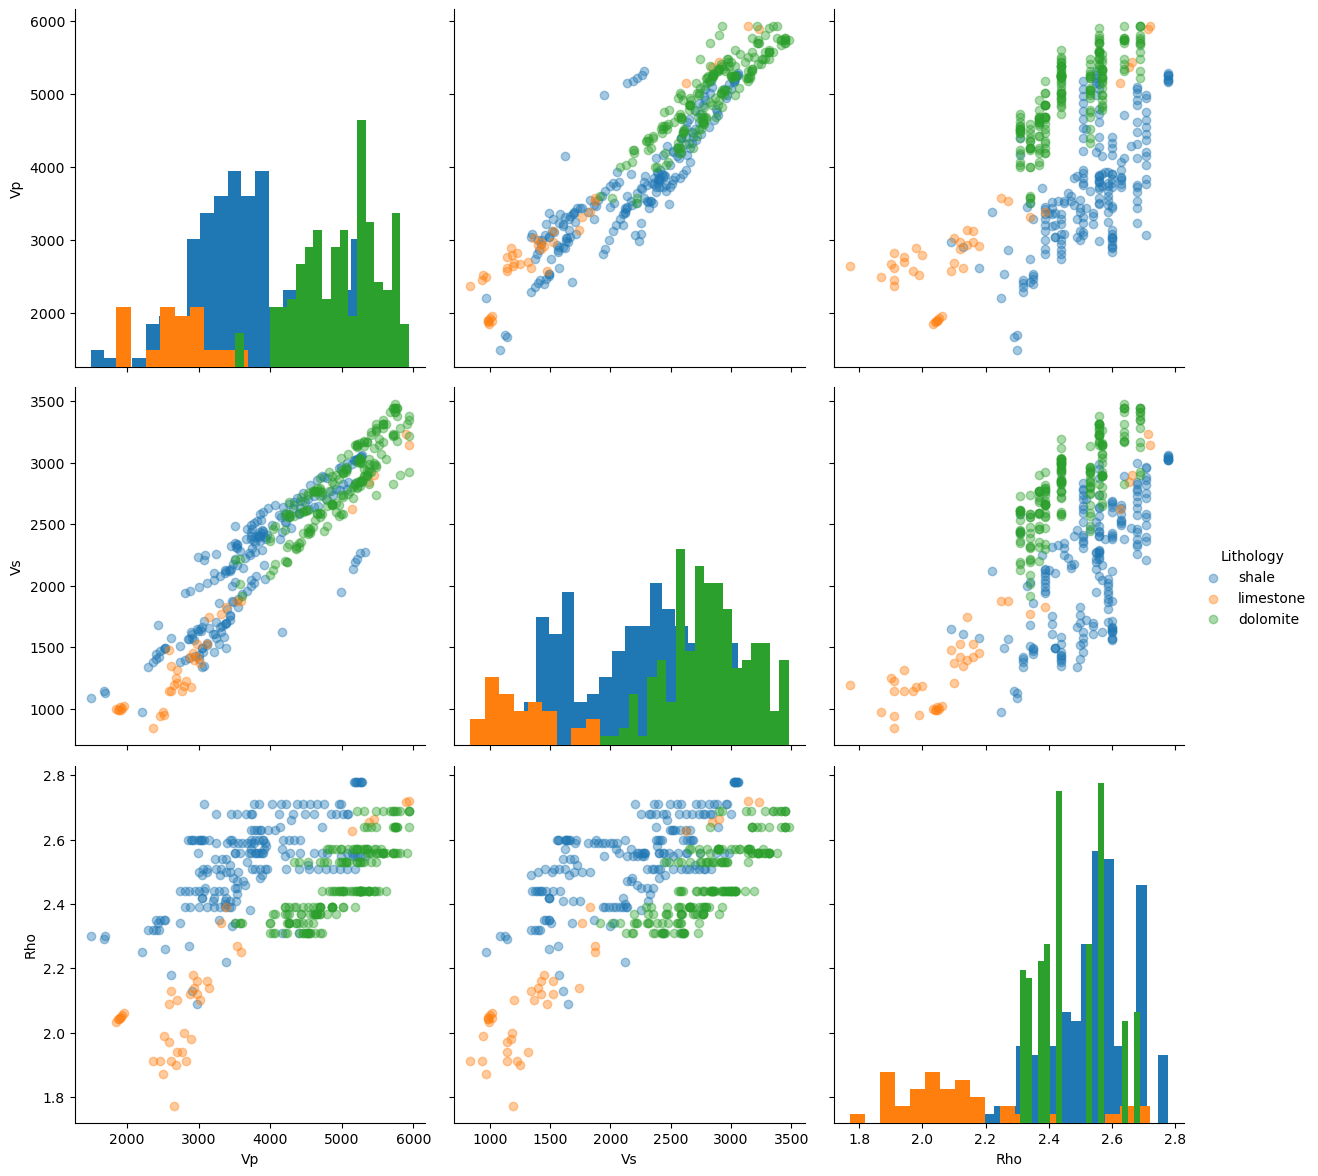

In [13]:
import matplotlib.pyplot as plt

g = sns.PairGrid(df, hue="Lithology", vars=['Vp','Vs','Rho'], height=4)

g.map_upper(plt.scatter, alpha=0.4)  
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist, bins=20)  
g.add_legend()

## Export for machine learning

### EXERCISE

Export the following columns to a new CSV, in this order: Rho, Vp, Vs, and Lithology. Some details:

- Call the file `mydata.csv`.
- Use 3 decimal places for all floats.
- Make sure Pandas does not include the RPC catalog numbers.

In [15]:
features = ['Rho', 'Vp', 'Vs']
target = ['Lithology']

df[features + target].to_csv("./mydata.csv", index=False, float_format='%.3f')

<hr />

<p style="color:gray">©2024 Matt Hall / Equinor. Licensed CC BY.</p>